In [1]:
library(caret)
library(pROC)

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [2]:
# Set seed for reproducibility
set.seed(123)

# Simulate data
n <- 100  # Number of observations
x1 <- rnorm(n, mean = 2, sd = 1)  # Predictor 1
x2 <- rnorm(n, mean = -1, sd = 2) # Predictor 2

# Logistic function to simulate binary outcome
logit_p <- 0.5 + 0.3 * x1 - 0.4 * x2
prob <- exp(logit_p) / (1 + exp(logit_p))
y <- rbinom(n, size = 1, prob = prob)  # Binary outcome

# Create a dataframe
data <- data.frame(y, x1, x2)

In [4]:
head(data)

,y,x1,x2
,<int>,<dbl>,<dbl>
1,0,1.439524,-2.4208131
2,1,1.769823,-0.4862326
3,0,3.558708,-1.4933838
4,1,2.070508,-1.6950852
5,1,2.129288,-2.9032371
6,1,3.715065,-1.0900554


In [5]:
model <- glm(y ~ x1 + x2, data = data, family = binomial())

In [6]:
summary(model)


Call:
glm(formula = y ~ x1 + x2, family = binomial(), data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   1.0757     0.7595   1.416  0.15670   
x1            0.1721     0.3484   0.494  0.62129   
x2           -0.4627     0.1566  -2.956  0.00312 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 84.542  on 99  degrees of freedom
Residual deviance: 73.882  on 97  degrees of freedom
AIC: 79.882

Number of Fisher Scoring iterations: 5


In [7]:
probabilities <- predict(model, type = "response")

In [9]:
predicted_classes <- ifelse(probabilities > 0.5, 1, 0)

In [10]:
# Confusion matrix
conf_matrix <- confusionMatrix(as.factor(predicted_classes), as.factor(data$y))
print(conf_matrix)

# Compute the ROC curve
roc_result <- roc(data$y, probabilities)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0  1  2
         1 14 83
                                          
               Accuracy : 0.84            
                 95% CI : (0.7532, 0.9057)
    No Information Rate : 0.85            
    P-Value [Acc > NIR] : 0.67246         
                                          
                  Kappa : 0.0643          
                                          
 Mcnemar's Test P-Value : 0.00596         
                                          
            Sensitivity : 0.06667         
            Specificity : 0.97647         
         Pos Pred Value : 0.33333         
         Neg Pred Value : 0.85567         
             Prevalence : 0.15000         
         Detection Rate : 0.01000         
   Detection Prevalence : 0.03000         
      Balanced Accuracy : 0.52157         
                                          
       'Positive' Class : 0               
                                    

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7514


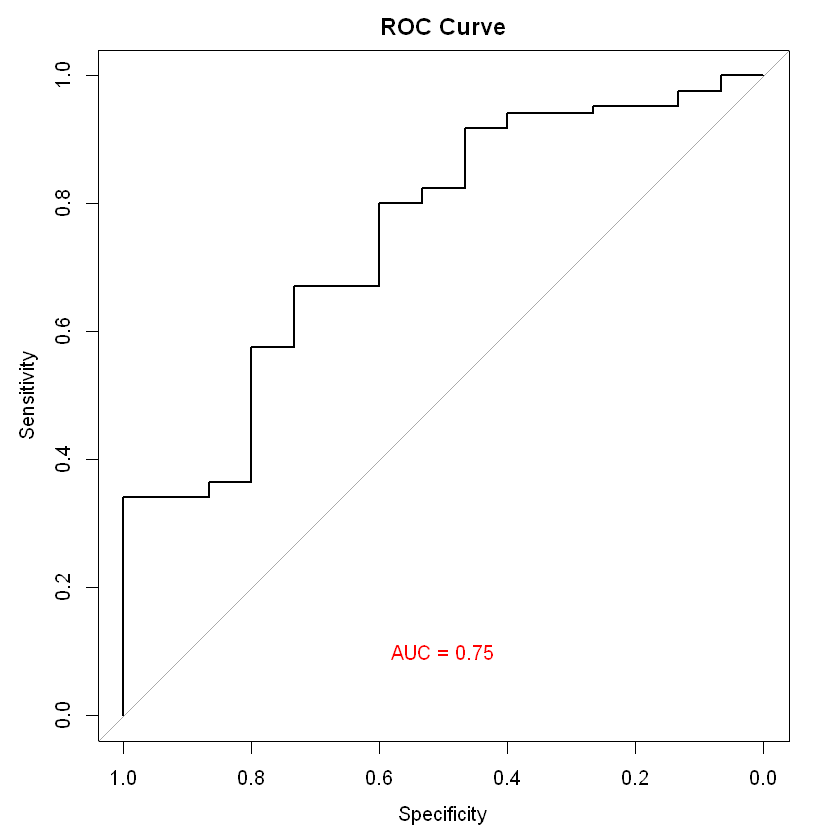

In [11]:
# Setting levels: control = 0, case = 1
# Setting direction: controls < cases
# is not an error but rather informative output. 
# This output indicates how the roc() function is interpreting the data:
# Setting levels: It has set '0' as the control (or negative class) and '1' as the case (or positive class). This is standard for a binary outcome where '1' typically represents the presence of a condition or a positive result, and '0' represents the absence or a negative result.
# Setting direction: The direction 'controls < cases' means that a lower predicted probability is interpreted as more likely to be a control (negative) and a higher probability as more likely to be a case (positive). This is the expected behavior in most logistic regression models where a higher probability indicates a stronger inclination towards the positive class.

# Plot the ROC curve
plot(roc_result, main = "ROC Curve")
text(0.5, 0.1, paste("AUC =", round(auc(roc_result), 2)), col = "red")

# Print AUC score
print(auc(roc_result))